In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import datetime

In [2]:
DATASET_PATH = os.path.join('/USER/TRAFFIC/data')

In [3]:
df = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))
df

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,...,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,...,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,...,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,...,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,...,875,2421,5816,2933,1206,2433,499,2952,1927,5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,...,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,...,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,...,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,...,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889


In [4]:
len(df)

3279

In [5]:
df['요일'] = 1

In [6]:
for i in range(len(df)):
    df['요일'][i] = pd.to_datetime(str(df['날짜'][i]),  format='%Y%m%d')

In [7]:
df["요일"] = pd.to_datetime(df["요일"])
df['요일'] = df['요일'].dt.dayofweek


In [8]:
df['요일']

0       2
1       2
2       2
3       2
4       2
       ..
3274    6
3275    6
3276    6
3277    6
3278    6
Name: 요일, Length: 3279, dtype: int64

In [9]:
num_to_day = {
    0: '월요일',
    1: '화요일',
    2: '수요일',
    3: '목요일',
    4: '금요일',
    5: '토요일',
    6: '일요일'
}
df['요일'] = [num_to_day[k] for k in df['요일']]

In [10]:
df['요일'].value_counts()

수요일    480
목요일    480
금요일    480
일요일    480
토요일    469
화요일    456
월요일    434
Name: 요일, dtype: int64

In [11]:
df.columns[2]

'10'

In [12]:
# df.sort_values(by=["요일",'시간']).group

In [13]:
df

,날짜,시간,10,100,101,120,121,140,150,160,...,1040,1100,1200,1510,2510,3000,4510,5510,6000,요일
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,...,3482,11299,7072,1176,3810,748,3920,2133,3799,수요일
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,...,3849,13180,8771,1283,3763,782,3483,2057,4010,수요일
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,...,2299,7986,5426,1536,3229,491,2634,1526,3388,수요일
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,...,1716,5703,3156,1104,2882,431,2488,1268,3686,수요일
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,...,2421,5816,2933,1206,2433,499,2952,1927,5608,수요일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,...,15431,25597,14292,9300,22238,3786,16936,10729,20194,일요일
3275,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,...,15378,24661,14747,8239,20604,3203,15018,9767,17962,일요일
3276,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,...,12558,22781,14081,6392,17937,2447,12403,7825,14031,일요일
3277,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,...,8870,16640,11066,4427,11955,1495,7507,5387,8889,일요일


In [14]:
df111 = df.groupby(['요일','시간']).mean()
df111

날짜             10           100          101           120  \
요일  시간                                                                         
금요일 0   2.020029e+07   83694.450000  15499.400000  1294.200000   3584.000000   
    1   2.020029e+07   65359.050000  11210.800000   984.350000   2798.650000   
    2   2.020029e+07   53748.050000   9529.750000   875.750000   2429.900000   
    3   2.020029e+07   53923.050000  11090.000000   933.900000   2585.150000   
    4   2.020029e+07   71516.000000  18058.150000  1299.150000   3893.100000   
...              ...            ...           ...          ...           ...   
화요일 19  2.020029e+07  252298.736842  67959.000000  6098.315789  15379.894737   
    20  2.020029e+07  218151.947368  55151.578947  4388.789474  11561.105263   
    21  2.020029e+07  194643.684211  42353.631579  3630.894737   9221.789474   
    22  2.020029e+07  153648.736842  31411.368421  2311.052632   6880.157895   
    23  2.020029e+07  111237.578947  21579.578947  1577.421053   4760.947368   

                121          140           150          160          200  ...  \
요일  시간                                                                    ...   
금요일 0   1024.250000  1010.050000  30388.700000   995.400000  2064.650000  ...   
    1    676.500000   836.650000  23198.500000   737.950000  1783.050000  ...   
    2    510.800000   701.500000  19237.900000   574.250000  1562.450000  ...   
    3    523.400000   701.400000  19880.100000   595.750000  1650.550000  ...   
    4    719.450000   914.950000  27782.950000   933.000000  2078.350000  ...   
...             ...          ...           ...          ...          ...  ...   
화요일 19  6693.368421  4601.789474  95420.210526  4434.052632  9999.000000  ...   
    20  4830.000000  3170.631579  80620.368421  3378.947368  7361.578947  ...   
    21  3554.631579  2477.000000  67007.894737  2742.263158  5947.157895  ...   
    22  2618.315789  1755.947368  51071.052632  2033.052632  4242.631579  ...   
    23  1562.947368  1228.736842  36133.473684  1355.631579  2844.421053  ...   

               1020          1040          1100          1200         1510  \
요일  시간                                                                       
금요일 0    796.800000   2827.500000   7478.800000   5229.100000  1585.450000   
    1    541.600000   1972.500000   4945.150000   3471.300000  1299.550000   
    2    399.500000   1605.700000   3809.750000   2547.100000  1140.300000   
    3    397.000000   1756.650000   4142.600000   2346.300000  1237.550000   
    4    599.700000   2668.150000   6854.850000   3464.950000  1670.650000   
...             ...           ...           ...           ...          ...   
화요일 19  5150.947368  12412.947368  36600.263158  19714.526316  3843.000000   
    20  4183.368421  11207.578947  29198.894737  17173.473684  3125.789474   
    21  2798.789474   8510.368421  23178.421053  14891.000000  2553.421053   
    22  1895.789474   6082.789474  16691.473684  11393.421053  1892.578947   
    23  1206.526316   4045.526316  11142.263158   7864.105263  1286.052632   

                2510         3000          4510         5510          6000  
요일  시간                                                                      
금요일 0    4302.400000   562.400000   2187.050000  1514.400000   2260.500000  
    1    3508.200000   382.300000   1602.350000  1145.350000   1791.850000  
    2    3168.500000   320.550000   1309.150000   979.550000   1546.350000  
    3    3310.850000   302.000000   1537.500000  1010.250000   1869.550000  
    4    4232.200000   464.850000   2586.050000  1628.000000   3015.350000  
...              ...          ...           ...          ...           ...  
화요일 19  14640.894737  2847.263158  14177.421053  8328.894737  14320.210526  
    20  11140.842105  1842.421053  10910.000000  6220.473684  10134.684211  
    21   9461.789474  1463.631579   7462.947368  4725.736842   7192.736842  
    22   7189.157895  1011.105263   4980.421053  3359.526316 

In [15]:
df111.to_csv('df111.csv')

In [16]:
df111 = pd.read_csv('/USER/TRAFFIC/df111.csv')

In [17]:
#요일별로 가져오기위해 csv 가져오기
time_stamp1 = pd.read_csv('/USER/TRAFFIC/prediction.csv')
time_stamp2 = time_stamp1.copy()
pred = time_stamp2.iloc[:,[1]]
pred['시간'] = 1
for i in range(len(pred)):
    pred['시간'][i] = pred['timestamp'][i][9:]
    pred['timestamp'][i] = pred['timestamp'][i][:8]


/tmp/ipykernel_53484/3110470591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['시간'] = 1
/tmp/ipykernel_53484/3110470591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['시간'][i] = pred['timestamp'][i][9:]
/tmp/ipykernel_53484/3110470591.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['timestamp'][i] = pred['timestamp'][i][:8]


In [18]:
pred = pred.copy()

In [19]:
pred['요일'] = 1

In [20]:
for i in range(len(pred)):
    pred['요일'][i] = pd.to_datetime(str(pred['timestamp'][i]),  format='%Y%m%d')

/tmp/ipykernel_53484/1719820954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['요일'][i] = pd.to_datetime(str(pred['timestamp'][i]),  format='%Y%m%d')


In [21]:
pred

,timestamp,시간,요일
0,20200525,0,2020-05-25 00:00:00
1,20200525,1,2020-05-25 00:00:00
2,20200525,2,2020-05-25 00:00:00
3,20200525,3,2020-05-25 00:00:00
4,20200525,4,2020-05-25 00:00:00
...,...,...,...
163,20200531,19,2020-05-31 00:00:00
164,20200531,20,2020-05-31 00:00:00
165,20200531,21,2020-05-31 00:00:00
166,20200531,22,2020-05-31 00:00:00


In [22]:
pred["요일"] = pd.to_datetime(pred["요일"])
pred['요일'] = pred['요일'].dt.dayofweek

num_to_day = {
    0: '월요일',
    1: '화요일',
    2: '수요일',
    3: '목요일',
    4: '금요일',
    5: '토요일',
    6: '일요일'
}
pred['요일'] = [num_to_day[k] for k in pred['요일']]

In [23]:
pred

,timestamp,시간,요일
0,20200525,0,월요일
1,20200525,1,월요일
2,20200525,2,월요일
3,20200525,3,월요일
4,20200525,4,월요일
...,...,...,...
163,20200531,19,일요일
164,20200531,20,일요일
165,20200531,21,일요일
166,20200531,22,일요일


In [24]:
df99 = df.columns[2:]
col = df99[:-1]
col

Index(['10', '100', '101', '120', '121', '140', '150', '160', '200', '201',
       '251', '270', '300', '301', '351', '352', '370', '400', '450', '500',
       '550', '600', '650', '652', '1000', '1020', '1040', '1100', '1200',
       '1510', '2510', '3000', '4510', '5510', '6000'],
      dtype='object')

In [25]:
df111

,요일,시간,날짜,10,100,101,120,121,140,150,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,금요일,0,2.020029e+07,83694.450000,15499.400000,1294.200000,3584.000000,1024.250000,1010.050000,30388.700000,...,796.800000,2827.500000,7478.800000,5229.100000,1585.450000,4302.400000,562.400000,2187.050000,1514.400000,2260.500000
1,금요일,1,2.020029e+07,65359.050000,11210.800000,984.350000,2798.650000,676.500000,836.650000,23198.500000,...,541.600000,1972.500000,4945.150000,3471.300000,1299.550000,3508.200000,382.300000,1602.350000,1145.350000,1791.850000
2,금요일,2,2.020029e+07,53748.050000,9529.750000,875.750000,2429.900000,510.800000,701.500000,19237.900000,...,399.500000,1605.700000,3809.750000,2547.100000,1140.300000,3168.500000,320.550000,1309.150000,979.550000,1546.350000
3,금요일,3,2.020029e+07,53923.050000,11090.000000,933.900000,2585.150000,523.400000,701.400000,19880.100000,...,397.000000,1756.650000,4142.600000,2346.300000,1237.550000,3310.850000,302.000000,1537.500000,1010.250000,1869.550000
4,금요일,4,2.020029e+07,71516.000000,18058.150000,1299.150000,3893.100000,719.450000,914.950000,27782.950000,...,599.700000,2668.150000,6854.850000,3464.950000,1670.650000,4232.200000,464.850000,2586.050000,1628.000000,3015.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,화요일,19,2.020029e+07,252298.736842,67959.000000,6098.315789,15379.894737,6693.368421,4601.789474,95420.210526,...,5150.947368,12412.947368,36600.263158,19714.526316,3843.000000,14640.894737,2847.263158,14177.421053,8328.894737,14320.210526
164,화요일,20,2.020029e+07,218151.947368,55151.578947,4388.789474,11561.105263,4830.000000,3170.631579,80620.368421,...,4183.368421,11207.578947,29198.894737,17173.473684,3125.789474,11140.842105,1842.421053,10910.000000,6220.473684,10134.684211
165,화요일,21,2.020029e+07,194643.684211,42353.631579,3630.894737,9221.789474,3554.631579,2477.000000,67007.894737,...,2798.789474,8510.368421,23178.421053,14891.000000,2553.421053,9461.789474,1463.631579,7462.947368,4725.736842,7192.736842
166,화요일,22,2.020029e+07,153648.736842,31411.368421,2311.052632,6880.157895,2618.315789,1755.947368,51071.052632,...,1895.789474,6082.789474,16691.473684,11393.421053,1892.578947,7189.157895,1011.105263,4980.421053,3359.526316,5040.315789


In [31]:
df_mon = df111[df111['요일']=='월요일']

df_tue = df111[df111['요일']=='화요일']

df_wed = df111[df111['요일']=='수요일']

df_thr = df111[df111['요일']=='목요일']

df_fri = df111[df111['요일']=='금요일']

df_sat = df111[df111['요일']=='토요일']

df_sun = df111[df111['요일']=='일요일']

df_total = pd.concat([df_mon, df_tue, df_wed, df_thr, df_fri, df_sat, df_sun])
df_total

,요일,시간,날짜,10,100,101,120,121,140,150,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
72,월요일,0,2.020029e+07,78671.789474,13506.210526,1163.105263,3296.631579,879.052632,804.789474,30228.368421,...,653.052632,2315.315789,5613.157895,3740.210526,1373.210526,3468.263158,353.315789,1939.736842,1295.842105,2171.421053
73,월요일,1,2.020029e+07,50851.315789,8451.578947,772.105263,2169.368421,553.210526,573.473684,19246.210526,...,370.000000,1473.105263,3356.684211,2324.894737,936.000000,2262.000000,231.473684,1249.631579,853.105263,1473.052632
74,월요일,2,2.020029e+07,40513.777778,7527.333333,612.888889,1968.333333,391.333333,524.444444,14722.888889,...,295.166667,1228.222222,2868.111111,1824.388889,734.444444,1828.222222,188.722222,1017.611111,760.055556,1235.611111
75,월요일,3,2.020029e+07,42867.833333,9349.388889,669.888889,2282.722222,415.166667,621.555556,15627.222222,...,330.277778,1425.333333,3380.666667,1857.555556,864.111111,2212.611111,258.944444,1301.333333,853.888889,1694.333333
76,월요일,4,2.020029e+07,73324.555556,17816.555556,1177.500000,4001.166667,716.555556,956.500000,30484.388889,...,593.611111,2670.333333,7469.333333,3533.444444,1327.222222,3733.611111,456.777778,2443.555556,1647.944444,3251.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,일요일,19,2.020030e+07,293903.100000,83355.000000,8748.800000,23406.150000,7941.700000,6352.500000,131493.350000,...,6014.550000,13395.200000,25811.750000,13464.650000,7256.000000,19388.800000,2861.600000,13397.950000,8778.050000,16903.400000
116,일요일,20,2.020030e+07,281862.350000,75062.550000,7246.950000,18682.350000,6414.950000,5045.500000,126035.700000,...,4661.900000,12547.150000,25203.650000,13674.650000,6518.450000,17579.950000,2335.050000,11572.400000,7867.600000,14732.200000
117,일요일,21,2.020030e+07,269052.350000,59102.950000,5252.800000,13905.650000,4510.000000,3609.550000,109937.800000,...,3396.200000,10294.550000,22228.650000,12518.000000,5131.050000,14546.800000,1709.550000,8714.150000,6133.950000,11341.050000
118,일요일,22,2.020030e+07,207548.800000,39357.750000,3272.550000,8950.300000,2871.200000,2242.800000,81507.400000,...,2123.650000,6897.700000,15755.900000,9471.100000,3550.800000,9965.700000,1061.600000,5668.400000,4054.150000,7128.250000


In [32]:
pred

,timestamp,시간,요일
0,20200525,0,월요일
1,20200525,1,월요일
2,20200525,2,월요일
3,20200525,3,월요일
4,20200525,4,월요일
...,...,...,...
163,20200531,19,일요일
164,20200531,20,일요일
165,20200531,21,일요일
166,20200531,22,일요일


In [33]:
df_total

,요일,시간,날짜,10,100,101,120,121,140,150,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
72,월요일,0,2.020029e+07,78671.789474,13506.210526,1163.105263,3296.631579,879.052632,804.789474,30228.368421,...,653.052632,2315.315789,5613.157895,3740.210526,1373.210526,3468.263158,353.315789,1939.736842,1295.842105,2171.421053
73,월요일,1,2.020029e+07,50851.315789,8451.578947,772.105263,2169.368421,553.210526,573.473684,19246.210526,...,370.000000,1473.105263,3356.684211,2324.894737,936.000000,2262.000000,231.473684,1249.631579,853.105263,1473.052632
74,월요일,2,2.020029e+07,40513.777778,7527.333333,612.888889,1968.333333,391.333333,524.444444,14722.888889,...,295.166667,1228.222222,2868.111111,1824.388889,734.444444,1828.222222,188.722222,1017.611111,760.055556,1235.611111
75,월요일,3,2.020029e+07,42867.833333,9349.388889,669.888889,2282.722222,415.166667,621.555556,15627.222222,...,330.277778,1425.333333,3380.666667,1857.555556,864.111111,2212.611111,258.944444,1301.333333,853.888889,1694.333333
76,월요일,4,2.020029e+07,73324.555556,17816.555556,1177.500000,4001.166667,716.555556,956.500000,30484.388889,...,593.611111,2670.333333,7469.333333,3533.444444,1327.222222,3733.611111,456.777778,2443.555556,1647.944444,3251.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,일요일,19,2.020030e+07,293903.100000,83355.000000,8748.800000,23406.150000,7941.700000,6352.500000,131493.350000,...,6014.550000,13395.200000,25811.750000,13464.650000,7256.000000,19388.800000,2861.600000,13397.950000,8778.050000,16903.400000
116,일요일,20,2.020030e+07,281862.350000,75062.550000,7246.950000,18682.350000,6414.950000,5045.500000,126035.700000,...,4661.900000,12547.150000,25203.650000,13674.650000,6518.450000,17579.950000,2335.050000,11572.400000,7867.600000,14732.200000
117,일요일,21,2.020030e+07,269052.350000,59102.950000,5252.800000,13905.650000,4510.000000,3609.550000,109937.800000,...,3396.200000,10294.550000,22228.650000,12518.000000,5131.050000,14546.800000,1709.550000,8714.150000,6133.950000,11341.050000
118,일요일,22,2.020030e+07,207548.800000,39357.750000,3272.550000,8950.300000,2871.200000,2242.800000,81507.400000,...,2123.650000,6897.700000,15755.900000,9471.100000,3550.800000,9965.700000,1061.600000,5668.400000,4054.150000,7128.250000


In [34]:
df_total_s = df_total.iloc[:,3:].reset_index().drop('index', axis=1)
result = pd.concat([pred, df_total_s], axis=1)
df_total_s

,10,100,101,120,121,140,150,160,200,201,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,78671.789474,13506.210526,1163.105263,3296.631579,879.052632,804.789474,30228.368421,908.526316,2197.157895,1503.368421,...,653.052632,2315.315789,5613.157895,3740.210526,1373.210526,3468.263158,353.315789,1939.736842,1295.842105,2171.421053
1,50851.315789,8451.578947,772.105263,2169.368421,553.210526,573.473684,19246.210526,571.842105,1487.473684,1114.631579,...,370.000000,1473.105263,3356.684211,2324.894737,936.000000,2262.000000,231.473684,1249.631579,853.105263,1473.052632
2,40513.777778,7527.333333,612.888889,1968.333333,391.333333,524.444444,14722.888889,473.277778,1244.444444,1162.833333,...,295.166667,1228.222222,2868.111111,1824.388889,734.444444,1828.222222,188.722222,1017.611111,760.055556,1235.611111
3,42867.833333,9349.388889,669.888889,2282.722222,415.166667,621.555556,15627.222222,511.555556,1454.611111,1612.055556,...,330.277778,1425.333333,3380.666667,1857.555556,864.111111,2212.611111,258.944444,1301.333333,853.888889,1694.333333
4,73324.555556,17816.555556,1177.500000,4001.166667,716.555556,956.500000,30484.388889,912.388889,2040.222222,2140.388889,...,593.611111,2670.333333,7469.333333,3533.444444,1327.222222,3733.611111,456.777778,2443.555556,1647.944444,3251.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,293903.100000,83355.000000,8748.800000,23406.150000,7941.700000,6352.500000,131493.350000,5800.250000,19264.700000,7883.050000,...,6014.550000,13395.200000,25811.750000,13464.650000,7256.000000,19388.800000,2861.600000,13397.950000,8778.050000,16903.400000
164,281862.350000,75062.550000,7246.950000,18682.350000,6414.950000,5045.500000,126035.700000,5245.850000,14977.000000,6903.300000,...,4661.900000,12547.150000,25203.650000,13674.650000,6518.450000,17579.950000,2335.050000,11572.400000,7867.600000,14732.200000
165,269052.350000,59102.950000,5252.800000,13905.650000,4510.000000,3609.550000,109937.800000,4154.050000,10460.750000,5514.750000,...,3396.200000,10294.550000,22228.650000,12518.000000,5131.050000,14546.800000,1709.550000,8714.150000,6133.950000,11341.050000
166,207548.800000,39357.750000,3272.550000,8950.300000,2871.200000,2242.800000,81507.400000,2800.800000,6582.100000,3809.700000,...,2123.650000,6897.700000,15755.900000,9471.100000,3550.800000,9965.700000,1061.600000,5668.400000,4054.150000,7128.250000


In [35]:
result

,timestamp,시간,요일,10,100,101,120,121,140,150,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525,0,월요일,78671.789474,13506.210526,1163.105263,3296.631579,879.052632,804.789474,30228.368421,...,653.052632,2315.315789,5613.157895,3740.210526,1373.210526,3468.263158,353.315789,1939.736842,1295.842105,2171.421053
1,20200525,1,월요일,50851.315789,8451.578947,772.105263,2169.368421,553.210526,573.473684,19246.210526,...,370.000000,1473.105263,3356.684211,2324.894737,936.000000,2262.000000,231.473684,1249.631579,853.105263,1473.052632
2,20200525,2,월요일,40513.777778,7527.333333,612.888889,1968.333333,391.333333,524.444444,14722.888889,...,295.166667,1228.222222,2868.111111,1824.388889,734.444444,1828.222222,188.722222,1017.611111,760.055556,1235.611111
3,20200525,3,월요일,42867.833333,9349.388889,669.888889,2282.722222,415.166667,621.555556,15627.222222,...,330.277778,1425.333333,3380.666667,1857.555556,864.111111,2212.611111,258.944444,1301.333333,853.888889,1694.333333
4,20200525,4,월요일,73324.555556,17816.555556,1177.500000,4001.166667,716.555556,956.500000,30484.388889,...,593.611111,2670.333333,7469.333333,3533.444444,1327.222222,3733.611111,456.777778,2443.555556,1647.944444,3251.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531,19,일요일,293903.100000,83355.000000,8748.800000,23406.150000,7941.700000,6352.500000,131493.350000,...,6014.550000,13395.200000,25811.750000,13464.650000,7256.000000,19388.800000,2861.600000,13397.950000,8778.050000,16903.400000
164,20200531,20,일요일,281862.350000,75062.550000,7246.950000,18682.350000,6414.950000,5045.500000,126035.700000,...,4661.900000,12547.150000,25203.650000,13674.650000,6518.450000,17579.950000,2335.050000,11572.400000,7867.600000,14732.200000
165,20200531,21,일요일,269052.350000,59102.950000,5252.800000,13905.650000,4510.000000,3609.550000,109937.800000,...,3396.200000,10294.550000,22228.650000,12518.000000,5131.050000,14546.800000,1709.550000,8714.150000,6133.950000,11341.050000
166,20200531,22,일요일,207548.800000,39357.750000,3272.550000,8950.300000,2871.200000,2242.800000,81507.400000,...,2123.650000,6897.700000,15755.900000,9471.100000,3550.800000,9965.700000,1061.600000,5668.400000,4054.150000,7128.250000


In [42]:
# result_con = result.iloc[:,3:]
# result_final = pd.concat([prediction, df_total_s], axis=1)
# result_final

In [43]:
# result_final.to_csv('prediction.csv')

In [44]:
# for i in range(168):
#     condition = (df111['요일'] == pred['요일'][i]) & (df111['시간'] == pred['시간'][i])
#     pred['10'][i] = df111[condition]


# EDA

In [45]:
# 도로 (ex)10번도로)별, 시간대별 평균구하기 
mean_list = []
for i in df.columns[2:]:
    df1 = df[['날짜', '시간', i]]
    a = df1.groupby(['시간'], as_index=False).mean()
    mean_list.append(a)


In [46]:
# 10번도로의 통행량 확인
mean_list[0].iloc[:,[2]]

,10
0,80173.623188
1,56958.166667
2,45276.000000
3,44243.642336
4,60451.605839
5,113564.941606
6,198701.598540
7,266732.175182
8,286127.204380
9,297369.978102


In [47]:
# 35개 도로가 잘 들어갔는지 확인
len(mean_list)

36

In [48]:
#time_stamp를 가져오기위해 csv 가져오기
time_stamp = pd.read_csv('/USER/TRAFFIC/prediction.csv')
prediction = time_stamp.iloc[:,[1]]
prediction

,timestamp
0,20200525_0
1,20200525_1
2,20200525_2
3,20200525_3
4,20200525_4
...,...
163,20200531_19
164,20200531_20
165,20200531_21
166,20200531_22


In [53]:
for i in range(len(mean_list)-1):
    a = mean_list[i].iloc[:,[2]]   # 각 도로별 통행량 평균치
    b = pd.concat([a]*7)# 평균치 * 7일
    b = b.reset_index(drop=True)  # index 떨궈주기
    prediction = pd.concat([prediction, b], axis=1)  # prediction에 concat한 뒤에 prediction 다시 변수 부여해줘야 함

In [54]:
prediction

,timestamp,10,100,101,120,121,140,150,160,200,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200525_0,80173.623188,14637.514493,1191.695652,3398.949275,1061.710145,940.739130,29371.782609,986.413043,2293.826087,...,788.920290,2785.108696,7360.036232,5138.797101,1285.442029,3703.579710,487.340580,2171.231884,1538.115942,2276.376812
1,20200525_1,56958.166667,9971.543478,832.840580,2504.376812,693.934783,696.550725,20529.905797,675.985507,1752.195652,...,506.862319,1902.710145,4772.702899,3432.659420,1048.797101,2752.789855,344.318841,1497.782609,1077.130435,1644.992754
2,20200525_2,45276.000000,8235.379562,720.394161,2136.605839,496.036496,581.802920,15929.248175,515.102190,1504.729927,...,375.919708,1490.175182,3715.751825,2521.416058,879.635036,2331.861314,284.773723,1235.905109,902.058394,1384.875912
3,20200525_3,44243.642336,9517.306569,754.343066,2271.481752,479.773723,590.372263,15785.058394,523.437956,1558.722628,...,364.437956,1545.620438,3823.116788,2271.072993,871.014599,2392.343066,279.058394,1407.700730,912.343066,1631.167883
4,20200525_4,60451.605839,15585.000000,1103.401460,3506.350365,702.452555,778.000000,23621.233577,811.919708,1994.700730,...,547.583942,2368.321168,6315.277372,3254.635036,1102.890511,3204.204380,433.562044,2276.386861,1450.313869,2682.540146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20200531_19,277572.352941,76171.779412,7516.147059,19127.088235,7516.772059,5634.007353,115598.544118,5075.316176,13707.830882,...,5843.838235,12884.757353,34766.191176,18027.161765,5683.007353,17591.176471,2992.500000,14491.426471,8911.014706,16107.213235
164,20200531_20,245752.264706,62229.558824,5497.941176,14300.875000,5472.227941,3967.352941,101184.992647,3999.830882,10176.323529,...,4481.830882,11466.529412,28895.220588,15978.919118,4688.691176,13910.830882,2093.323529,11081.801471,6730.323529,11823.404412
165,20200531_21,221562.360294,47894.720588,4252.522059,10812.198529,4037.757353,2989.617647,85340.470588,3240.647059,7721.705882,...,3086.705882,9080.191176,23685.919118,14164.977941,3740.720588,11413.051471,1624.397059,7886.544118,5176.463235,8642.286765
166,20200531_22,173364.213235,34289.360294,2796.529412,7588.492647,2884.169118,2066.919118,64557.029412,2334.139706,5316.941176,...,2108.102941,6579.566176,17381.919118,11115.573529,2729.698529,8284.566176,1098.595588,5337.102941,3691.566176,5852.632353


In [ ]:
prediction.to_csv('prediction.csv')   # 제출파일

# 도로별 통행량 비교

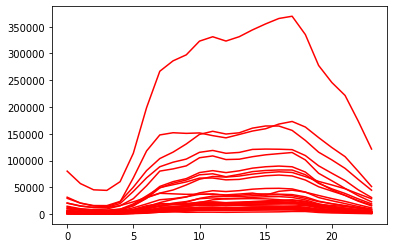

In [75]:
# 도로별 통행량 비교 
for i in range(len(mean_list)-1):
    a = np.array(mean_list[i]['시간'])
    b = np.array(mean_list[i].iloc[:, 2])
    plt.plot(a, b, 'r-')

plt.show()

In [56]:
df1 = df[['날짜', '시간', '10']]
df1

,날짜,시간,10
0,20200101,0,83247
1,20200101,1,89309
2,20200101,2,66611
3,20200101,3,53290
4,20200101,4,52095
...,...,...,...
3274,20200517,19,311727
3275,20200517,20,305354
3276,20200517,21,306008
3277,20200517,22,237447


In [57]:
df1['날짜'].value_counts()

20200101    24
20200405    24
20200329    24
20200331    24
20200401    24
            ..
20200216    24
20200217    24
20200218    24
20200229    13
20200330     2
Name: 날짜, Length: 138, dtype: int64

In [58]:
df20200330 = df1[df1['날짜']==20200330]
df20200229 = df1[df1['날짜']==20200229]

print(df20200330)
print(df20200229)

            날짜  시간     10
2125  20200330   0  38243
2126  20200330   1  20378
            날짜  시간      10
1416  20200229   0   70783
1417  20200229   1   51754
1418  20200229   2   41031
1419  20200229   3   37688
1420  20200229   4   46899
1421  20200229   5   80770
1422  20200229   6  126497
1423  20200229   7  156874
1424  20200229   8  189865
1425  20200229   9  229212
1426  20200229  10  263691
1427  20200229  11  273499
1428  20200229  12  262765


In [59]:
lst = []

In [60]:
for i in range(20200101, 20200518):
    a = globals()['df_{}'.format(i)] = df1[df1['날짜'] == i]
    lst.append(a)

In [61]:
lst[:2]

[          날짜  시간      10
 0   20200101   0   83247
 1   20200101   1   89309
 2   20200101   2   66611
 3   20200101   3   53290
 4   20200101   4   52095
 5   20200101   5   62591
 6   20200101   6   72799
 7   20200101   7   98367
 8   20200101   8  138272
 9   20200101   9  204720
 10  20200101  10  285893
 11  20200101  11  324836
 12  20200101  12  320617
 13  20200101  13  331264
 14  20200101  14  359475
 15  20200101  15  384305
 16  20200101  16  387721
 17  20200101  17  354546
 18  20200101  18  299045
 19  20200101  19  272186
 20  20200101  20  256661
 21  20200101  21  230300
 22  20200101  22  170933
 23  20200101  23  107623,
           날짜  시간      10
 24  20200102   0   62778
 25  20200102   1   40492
 26  20200102   2   32815
 27  20200102   3   36717
 28  20200102   4   64090
 29  20200102   5  142571
 30  20200102   6  248187
 31  20200102   7  321245
 32  20200102   8  302631
 33  20200102   9  282018
 34  20200102  10  307976
 35  20200102  11  324038
 36  202001

In [62]:
np.array(df_20200101['시간'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [63]:
len(lst)

417

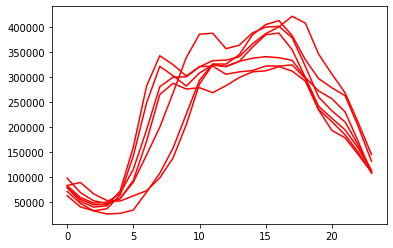

In [64]:
for i in range(len(lst)%10):
    a = np.array(lst[i]['시간'])
    b = np.array(lst[i]['10'])
    plt.plot(a, b, 'r-')

plt.show()

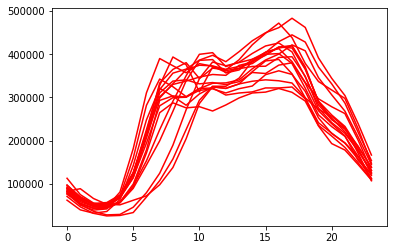

In [65]:
for i in range(len(lst)%20):
    a = np.array(lst[i]['시간'])
    b = np.array(lst[i]['10'])
    plt.plot(a, b, 'r-')

plt.show()

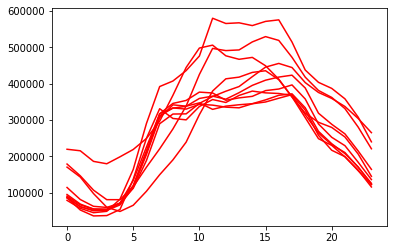

In [66]:
for i in range(20, 30):
    a = np.array(lst[i]['시간'])
    b = np.array(lst[i]['10'])
    plt.plot(a, b, 'r-')

plt.show()

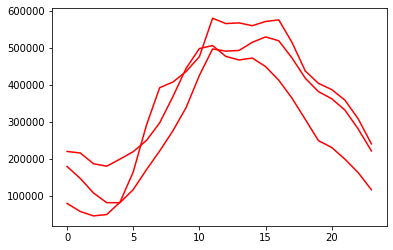

In [67]:
for i in range(23, 26):
    a = np.array(lst[i]['시간'])
    b = np.array(lst[i]['10'])
    plt.plot(a, b, 'r-')

plt.show()

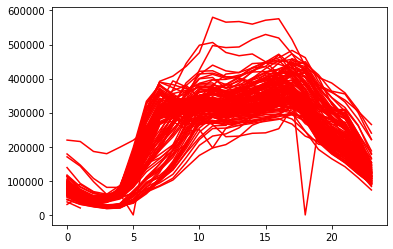

In [68]:
for i in range(len(lst)):
    a = np.array(lst[i]['시간'])
    b = np.array(lst[i]['10'])
    plt.plot(a, b, 'r-')

plt.show()

In [69]:
df2 = df1[df1['시간']==18]
df2['10'].idxmin()

882

In [70]:
df1.iloc[882]

날짜    20200206
시간          18
10           0
Name: 882, dtype: int64

In [71]:
df1.mean()

날짜    2.020030e+07
시간    1.147149e+01
10    2.316765e+05
dtype: float64

In [72]:
df10 = df1.groupby(['시간'], as_index=False).mean()

In [73]:
df10['10']

0      80173.623188
1      56958.166667
2      45276.000000
3      44243.642336
4      60451.605839
5     113564.941606
6     198701.598540
7     266732.175182
8     286127.204380
9     297369.978102
10    322980.138686
11    331155.226277
12    323143.233577
13    331228.272059
14    343933.948529
15    355188.426471
16    365293.705882
17    369459.698529
18    335238.036765
19    277572.352941
20    245752.264706
21    221562.360294
22    173364.213235
23    121464.860294
Name: 10, dtype: float64

In [74]:
df = df1.groupby(['시간'], as_index=False).mean()